#### 1.	What are the advantages of a CNN over a fully connected DNN for image classification?

CNNs offer several advantages over fully connected DNNs specifically in the domain of image classification. Here are some key advantages:

1. Parameter efficiency: CNNs utilize shared weights and biases in their convolutional layers, resulting in a significantly lower number of parameters compared to fully connected DNNs. This parameter efficiency makes CNNs more effective at processing large images and mitigates the risk of overfitting.

2. Translation invariance: CNNs are capable of recognizing patterns and features within an image regardless of their spatial location, exhibiting translation invariance. Achieved through convolutional layers that slide filters across the image, CNNs can detect patterns within local regions. This characteristic makes CNNs well-suited for image classification tasks where the target object can appear anywhere in the image.

3. Hierarchical feature learning: CNNs leverage multiple layers of feature extraction to learn hierarchical representations of images. By progressively learning high-level concepts, such as object categories, from low-level features like edges and corners, CNNs capture rich spatial relationships. On the other hand, fully connected DNNs treat input features as independent entities, neglecting the spatial context.

4. Robustness to input variations: CNNs are inherently designed to be robust to various input variations, including changes in lighting, rotation, and scale. Techniques like pooling are employed to reduce the network's sensitivity to minor input changes, enhancing the model's stability and generalization capabilities.

These advantages make CNNs highly effective for image classification tasks, enabling them to learn intricate patterns, handle diverse input variations, and achieve superior performance compared to fully connected DNNs.

#### 2.	Consider a CNN composed of three convolutional layers, each with 3 × 3 kernels, a stride of 2, and "same" padding. The lowest layer outputs 100 feature maps, the middle one outputs 200, and the top one outputs 400. The input images are RGB images of 200 × 300 pixels.
What is the total number of parameters in the CNN? If we are using 32-bit floats, at least how much RAM will this network require when making a prediction for a single instance? What about when training on a mini-batch of 50 images?

To calculate the total number of parameters in a CNN, you can sum up the number of parameters in each layer. The number of parameters in a convolutional layer depends on the size of the filters, the number of filters, and the number of input channels. The formula to calculate the number of parameters in a convolutional layer is:

Number of parameters = (size of filter * number of input channels + 1) * number of filters

By using this formula, you can calculate the number of parameters in each convolutional layer:

- The first convolutional layer: (3 * 3 * 3 + 1) * 100 = 2,800 parameters
- The second convolutional layer: (3 * 3 * 100 + 1) * 200 = 180,200 parameters
- The third convolutional layer: (3 * 3 * 200 + 1) * 400 = 1,160,400 parameters

Therefore, the total number of parameters in the CNN is 2,800 + 180,200 + 1,160,400 = 1,343,400 parameters.

To estimate the amount of RAM required for prediction or training, you need to consider the size of the input and output tensors and the data type being used. Assuming you are using 32-bit floats (4 bytes), the size of the input tensor for a single image is 200 x 300 x 3 = 180,000 bytes. The size of the output tensor for a single image is (200 / 8) x (300 / 8) x 400 x 4 = 6,000,000 bytes.

Therefore, the total RAM required for prediction for a single instance is approximately 6,180,000 bytes (6.18 MB).

If you are training on a mini-batch of 50 images, the total RAM required would be 50 times the RAM required for a single instance, which is approximately 309 MB. However, please note that this estimation only considers the memory required for storing the input and output tensors during one forward pass of the network. The actual memory requirements for training depend on various factors such as the batch size, model size, optimizer choice, and other considerations.

#### 3.	If your GPU runs out of memory while training a CNN, what are five things you could try to solve the problem?

If your GPU runs out of memory while training a CNN, here are five strategies you can try to address the issue:

1. Decrease batch size: Reducing the batch size is an effective way to decrease memory usage. By processing fewer samples in each iteration, the memory requirements are reduced. However, note that smaller batch sizes may result in slower convergence or less accurate gradients.

2. Reduce input size: If the input images are large, downsampling them to a smaller size can help reduce memory usage. This can be achieved by resizing the images or cropping them to a smaller region of interest. Be aware that reducing the input size may impact the model's ability to capture fine details.

3. Utilize mixed precision training: Employing mixed precision training involves using 16-bit floating point numbers (half-precision) instead of 32-bit (single-precision) for storing weights and activations. This technique can significantly reduce memory usage while maintaining a comparable level of model accuracy. However, it requires careful handling to ensure numerical stability.

4. Reduce model complexity: Simplifying the model architecture can decrease memory requirements. This can be accomplished by reducing the number of layers, filters, or neurons, or using smaller kernel sizes. Keep in mind that reducing model complexity may result in a trade-off with model performance.

5. Employ gradient checkpointing: Gradient checkpointing is a method that trades computation time for memory usage. Instead of storing all intermediate activations during the forward pass for backpropagation, only a subset of the activations are stored. This reduces memory consumption but increases the computational cost during the backward pass.

Remember that the effectiveness of these strategies depends on the specific model, dataset, and hardware configuration. Experimentation and careful evaluation are necessary to determine the best approach for your particular scenario.

#### 4.	Why would you want to add a max pooling layer rather than a convolutional layer with the same stride?

Max pooling and convolutional layers with the same stride both lead to a reduction in spatial resolution of feature maps. However, there are specific advantages of using max pooling over convolution:

1. Non-linearity: Max pooling introduces non-linearity through the selection of the maximum value within each pooling region. This non-linear activation function allows the network to capture more complex and nonlinear features compared to a convolutional layer with the same stride, which applies a linear transformation to the input.

2. Translation invariance: Max pooling exhibits greater translation invariance than convolution with a stride. This property makes the network less sensitive to small shifts in the input image, resulting in improved robustness to slight variations in the data. This can be particularly beneficial in tasks where the object of interest may appear in different locations within the image.

3. Computational efficiency: Max pooling is computationally more efficient than convolution with the same stride since it does not involve any learnable parameters. It simply selects the maximum value within each pooling region. As a result, using max pooling can reduce the computational burden and overall complexity of the network.

4. Overfitting reduction: Max pooling can help mitigate overfitting by reducing the spatial resolution of the feature maps. By downsampling the feature maps, the network focuses on capturing the most salient and essential features while discarding some spatial information. This can prevent the model from excessively memorizing the training data and improve generalization to unseen examples.

While both max pooling and convolutional layers with the same stride reduce spatial resolution, max pooling offers distinct advantages in terms of non-linearity, translation invariance, computational efficiency, and overfitting reduction. The choice between the two will depend on the specific requirements and constraints of the task at hand.

#### 5.	When would you want to add a local response normalization layer?

Adding a local response normalization (LRN) layer to a convolutional neural network (CNN) can have several benefits in certain scenarios. Here are some situations where it may be advantageous to include an LRN layer:

1. Large-scale datasets: LRN is particularly beneficial when working with large-scale datasets. By promoting competition among feature maps, LRN helps the network generalize better and reduces overfitting. This can lead to improved performance and more accurate predictions on large and diverse datasets.

2. Convolutional layers with large receptive fields: When a convolutional layer has a large receptive field, there is a higher probability of irrelevant features being activated alongside the target object. LRN can assist in suppressing the responses of irrelevant feature maps, thus enhancing the selectivity and discriminability of the network.

3. Networks with multiple convolutional layers: In CNNs with multiple convolutional layers, the addition of an LRN layer can encourage competition among feature maps. This competition can help the network learn more robust and distinctive features, preventing overfitting and improving the generalization capabilities of the model.

4. Image classification tasks: LRN has demonstrated significant effectiveness in enhancing CNN performance on image classification tasks. By normalizing neuron responses based on the sum of squares of neighboring activations, LRN encourages more discriminative feature learning. This, in turn, can improve the network's ability to classify images accurately.

It is important to note that the effectiveness of LRN can depend on the specific dataset, network architecture, and task at hand. While LRN has shown benefits in certain scenarios, its usage may not always be necessary or provide significant improvements in performance. Therefore, it is recommended to experiment and evaluate the impact of adding an LRN layer based on the specific requirements and characteristics of the problem being addressed.

#### 6.	Can you name the main innovations in AlexNet, compared to LeNet-5? What about the main innovations in GoogLeNet, ResNet, SENet, and Xception?

Main Innovations with respect to each transfer learning models
AlexNet:

AlexNet was one of the first successful deep convolutional neural networks for image classification.
It had 5 convolutional layers and 3 fully connected layers.
AlexNet used Rectified Linear Units (ReLU) activation function instead of the traditional sigmoid activation function used in LeNet-5.
It also used data augmentation techniques such as cropping and flipping to reduce overfitting and increase the size of the training dataset.
AlexNet used dropout regularization to further reduce overfitting.
AlexNet was trained on two GPUs simultaneously, which reduced the training time significantly.
GoogLeNet:

GoogLeNet introduced the concept of Inception modules, which allowed for the efficient use of multiple filter sizes in a single layer.
It had 22 layers and was the first network to exceed human-level performance on the ImageNet classification task.
GoogLeNet also used global average pooling instead of fully connected layers, which significantly reduced the number of parameters in the network.
It used a 1x1 convolutional layer to reduce the dimensionality of the feature maps before applying more computationally expensive convolutional layers.
ResNet:

ResNet introduced the concept of residual blocks, which allowed for the training of very deep networks without suffering from the problem of vanishing gradients.
It had up to 152 layers and achieved state-of-the-art performance on several computer vision tasks.
ResNet used skip connections to connect earlier layers directly to later layers, which helped to propagate gradients more effectively during training.
It also used batch normalization to accelerate training and improve generalization.
SENet:

SENet introduced the concept of Squeeze-and-Excitation (SE) blocks, which allowed the network to adaptively recalibrate the importance of each feature map based on the global context of the image.
It achieved state-of-the-art performance on several computer vision tasks.
SENet used a global average pooling layer to reduce the dimensionality of the feature maps before applying the SE blocks.
It also used residual connections to help propagate gradients more effectively during training.
Xception:

Xception introduced the concept of depthwise separable convolutions, which separate the spatial filtering and channel-wise filtering operations.
It had fewer parameters and was more computationally efficient than other state-of-the-art models while achieving comparable or better performance.
Xception used residual connections and batch normalization to accelerate training and improve generalization.
It also used global average pooling instead of fully connected layers to reduce the number of parameters in the network.

#### 7.	What is a fully convolutional network? How can you convert a dense layer into a convolutional layer?

To clarify the process of converting a dense layer into a convolutional layer:

1. Reshape the weight matrix of the dense layer to have the shape of a convolutional kernel. This involves specifying the kernel size (e.g., 3x3) and adjusting the dimensions to match the desired input and output channels.

2. Reshape the output of the preceding convolutional layer or the input to the dense layer to match the shape expected by the dense layer.

3. Apply the convolution operation using the reshaped kernel to the reshaped input. This results in an output with the desired shape, equivalent to the original dense layer's output.

By converting the dense layer in this manner, it becomes compatible with a fully convolutional network, enabling seamless integration and leveraging the advantages offered by convolutional layers.

#### 8.	What is the main technical difficulty of semantic segmentation?

Semantic segmentation is indeed a challenging task that requires the network to capture both spatial and semantic information in an image. Here are some techniques used to address these difficulties:

1. Encoder-Decoder Architectures: These architectures consist of an encoder network that captures the spatial information and a decoder network that recovers the spatial resolution and refines the segmentation results. This allows the network to learn both local and global context.

2. Skip Connections: Skip connections establish direct connections between encoder and decoder layers at different resolutions. These connections enable the network to combine low-level spatial details from early layers with high-level semantic information from later layers, aiding in accurate segmentation.

3. Multi-scale Features: Incorporating multi-scale features involves processing the image at multiple resolutions. This allows the network to capture objects of various sizes and contextual information at different scales, enhancing segmentation performance.

4. Dilated Convolutions: Dilated convolutions, also known as atrous convolutions, enable the network to have a larger receptive field without increasing the number of parameters or reducing spatial resolution. They capture both local details and global context, beneficial for handling objects of different scales.

5. Data Augmentation: Data augmentation techniques, such as random cropping, flipping, rotation, and color perturbations, can help mitigate the effects of limited training data. They introduce diversity into the training set, allowing the network to generalize better and improve performance, particularly for minority classes.

These techniques, among others, have contributed to advancements in semantic segmentation and have helped overcome the challenges of accurately classifying each pixel into pre-defined classes, handling class imbalance, and learning spatial and semantic information effectively.

#### 9.	Build your own CNN from scratch and try to achieve the highest possible accuracy on MNIST.

#### 10.	Use transfer learning for large image classification, going through these steps:
- a.	Create a training set containing at least 100 images per class. For example, you could classify your own pictures based on the location (beach, mountain, city, etc.), or alternatively you can use an existing dataset (e.g., from TensorFlow Datasets).
- b.	Split it into a training set, a validation set, and a test set.
- c.	Build the input pipeline, including the appropriate preprocessing operations, and optionally add data augmentation.
- d.	Fine-tune a pretrained model on this dataset.

In [1]:
import tensorflow as tf
from tensorflow.keras import layers

In [2]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
# Normalize the pixel values to the range [0, 1]
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

In [4]:
# Add a channel dimension to the images
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

In [5]:
# Define the model
model = tf.keras.Sequential([
    layers.Conv2D(32, 3, activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10)
])

In [6]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 27s 6ms/step - loss: 0.2147 - accuracy: 0.9341 - val_loss: 0.0442 - val_accuracy: 0.9848
Epoch 2/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0837 - accuracy: 0.9749 - val_loss: 0.0326 - val_accuracy: 0.9881
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0626 - accuracy: 0.9818 - val_loss: 0.0295 - val_accuracy: 0.9906
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0496 - accuracy: 0.9852 - val_loss: 0.0267 - val_accuracy: 0.9911
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0423 - accuracy: 0.9873 - val_loss: 0.0216 - val_accuracy: 0.9924
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0338 - accuracy: 0.9894 - val_loss: 0.0239 - val_accuracy: 0.9920
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0312 - accuracy: 0.9901 - val_loss: 0.0278 - val_accu

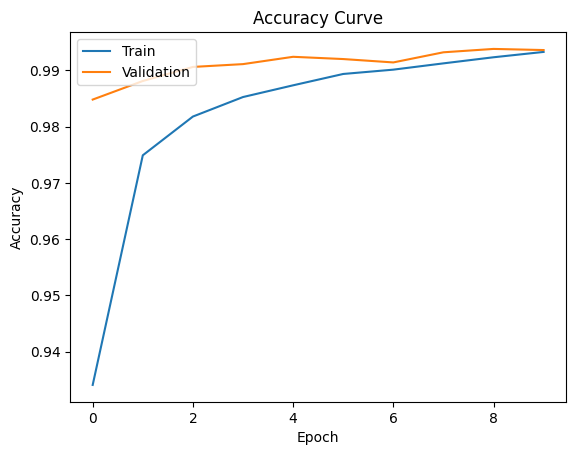

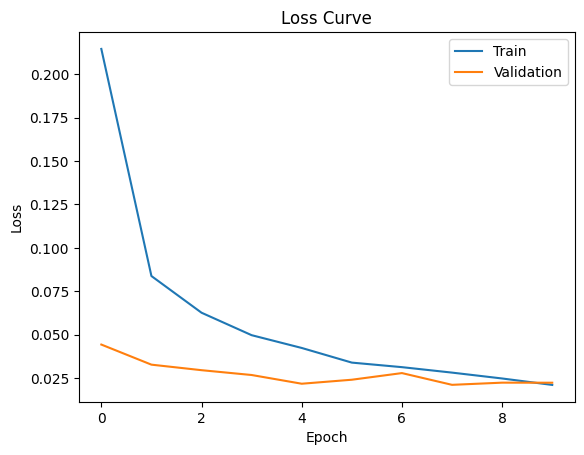

In [7]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy Curve')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot the loss curve
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [8]:
predictions = model.predict(x_test)

# Evaluate the performance of the model
loss, accuracy = model.evaluate(x_test, y_test)

# Print the predictions and evaluation results
print("Predictions:", predictions)
print("Loss:", loss)
print("Accuracy:", accuracy)

313/313 [==============================] - 1s 3ms/step - loss: 0.0222 - accuracy: 0.9936
Predictions: [[-18.091652   -4.49523    -6.4263    ...  18.742897  -16.78285
   -5.8894606]
 [ -6.2801867  -3.7417102  18.606606  ...  -8.809255  -11.62499
  -18.965502 ]
 [-17.42496    14.606454  -12.653875  ...  -2.4274843 -11.477577
  -11.180757 ]
 ...
 [-23.551903   -6.7249417 -16.379276  ...  -2.5293365  -2.7173645
   -4.17648  ]
 [-13.528423  -16.801504  -26.18615   ... -21.308842    1.4189004
   -9.164251 ]
 [ -5.5974545 -13.11985   -13.3904505 ... -26.226957   -8.468157
  -15.827466 ]]
Loss: 0.022224878892302513
Accuracy: 0.9936000108718872


10. Use transfer learning for large image classification, going through these steps:
a. Create a training set containing at least 100 images per class. For example, you could classify your own pictures based on the location (beach, mountain, city, etc.), or alternatively you can use an existing dataset (e.g., from TensorFlow Datasets).
b. Split it into a training set, a validation set, and a test set.
c. Build the input pipeline, including the appropriate preprocessing operations, and optionally add data augmentation.
d. Fine-tune a pretrained model on this dataset.

In [9]:
import tensorflow_datasets as tfds

In [10]:
(train_ds, val_ds, test_ds), info = tfds.load('cats_vs_dogs',
                                             split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
                                             with_info=True,
                                             as_supervised=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/23262 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cats_vs_dogs/4.0.0.incompleteWC607S/cats_vs_dogs-train.tfrecord*...:   0%|…

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.0. Subsequent calls will reuse this data.


In [11]:
IMG_SIZE = 224
BATCH_SIZE = 32

def preprocess_image(image, label):
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    image = tf.cast(image, tf.float32) / 255.0
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_crop(image, size=(IMG_SIZE, IMG_SIZE, 3))
    return image, label

train_ds = train_ds.map(preprocess_image).shuffle(1000).batch(BATCH_SIZE)
val_ds = val_ds.map(preprocess_image).batch(BATCH_SIZE)
test_ds = test_ds.map(preprocess_image).batch(BATCH_SIZE)

In [13]:
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model



In [15]:
from tensorflow.keras.applications import Xception

In [16]:
base_model = Xception(include_top=False, weights='imagenet', input_shape=(IMG_SIZE, IMG_SIZE, 3))

for layer in base_model.layers:
    layer.trainable = False

x = GlobalAveragePooling2D()(base_model.output)
x = Dense(2, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=x)

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_ds, epochs=5, validation_data=val_ds)

83683744/83683744 [==============================] - 0s 0us/step
Epoch 1/5
582/582 [==============================] - 97s 150ms/step - loss: 0.0491 - accuracy: 0.9839 - val_loss: 0.0368 - val_accuracy: 0.9884
Epoch 2/5
582/582 [==============================] - 92s 155ms/step - loss: 0.0315 - accuracy: 0.9891 - val_loss: 0.0439 - val_accuracy: 0.9854
Epoch 3/5
582/582 [==============================] - 92s 153ms/step - loss: 0.0289 - accuracy: 0.9898 - val_loss: 0.0396 - val_accuracy: 0.9862
Epoch 4/5
582/582 [==============================] - 91s 153ms/step - loss: 0.0231 - accuracy: 0.9921 - val_loss: 0.0422 - val_accuracy: 0.9858
Epoch 5/5
582/582 [==============================] - 91s 153ms/step - loss: 0.0224 - accuracy: 0.9923 - val_loss: 0.0408 - val_accuracy: 0.9880


In [17]:
test_loss, test_acc = model.evaluate(test_ds)
print('Test accuracy:', test_acc)

73/73 [==============================] - 10s 129ms/step - loss: 0.0297 - accuracy: 0.9897
Test accuracy: 0.9896818399429321


In [18]:
# train test split

(train_ds, val_ds, test_ds), info = tfds.load('cats_vs_dogs',
                                             split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
                                             with_info=True,
                                             as_supervised=True)

Build the input pipeline, including the appropriate preprocessing operations, and optionally add data augmentation.

In [19]:
# Define preprocessing functions
IMG_SIZE = 224
NUM_CLASSES = 2

def preprocess_image(image, label):
    # Resize the image to the input size of the model
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    # Convert the pixel values to the range [0, 1]
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

def augment_image(image, label):
    # Randomly flip the image horizontally
    image = tf.image.random_flip_left_right(image)
    # Randomly adjust the brightness of the image
    image = tf.image.random_brightness(image, max_delta=0.1)
    return image, label

In [20]:
# Create the training dataset
train_ds = train_ds.shuffle(1000)
train_ds = train_ds.map(preprocess_image, num_parallel_calls=tf.data.AUTOTUNE)
train_ds = train_ds.map(augment_image, num_parallel_calls=tf.data.AUTOTUNE)
train_ds = train_ds.batch(batch_size=32)
train_ds = train_ds.prefetch(tf.data.AUTOTUNE)

In [21]:
# Create the validation dataset
val_ds = val_ds.map(preprocess_image, num_parallel_calls=tf.data.AUTOTUNE)
val_ds = val_ds.batch(batch_size=32)
val_ds = val_ds.prefetch(tf.data.AUTOTUNE)

In [22]:
# Create the test dataset
test_ds = test_ds.map(preprocess_image, num_parallel_calls=tf.data.AUTOTUNE)
test_ds = test_ds.batch(batch_size=32)
test_ds = test_ds.prefetch(tf.data.AUTOTUNE)

In [23]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.applications import VGG19

In [24]:
# Define preprocessing functions
IMG_SIZE = 224
NUM_CLASSES = 2

def preprocess_image(image, label):
    # Resize the image to the input size of the model
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    # Convert the pixel values to the range [-1, 1]
    image = tf.cast(image, tf.float32) / 127.5 - 1.0
    return image, label

In [25]:
# Apply preprocessing to the datasets
train_ds = train_ds.map(preprocess_image).shuffle(1000).batch(32).prefetch(tf.data.AUTOTUNE)
val_ds = val_ds.map(preprocess_image).batch(32).prefetch(tf.data.AUTOTUNE)
test_ds = test_ds.map(preprocess_image).batch(32)

In [26]:
base_model = VGG19(input_shape=(IMG_SIZE, IMG_SIZE, 3), include_top=False, weights='imagenet')

80134624/80134624 [==============================] - 0s 0us/step


In [27]:
# Freeze the base model's layers
for layer in base_model.layers:
    layer.trainable = False

In [28]:
# Add a new classification layer on top of the base model
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
output_layer = tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')(global_average_layer)

In [29]:
# Create the fine-tuned model
model = tf.keras.models.Model(inputs=base_model.input, outputs=output_layer)

In [30]:
# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])